In [15]:
import plotly.graph_objects as go
import matplotlib
# 设置中文字体和允许负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
# 给定数据
data = {
    "market_share_2023H1": {
        "汽油": 64.5,
        "纯电": 21.2,
        "插电混合动力": 7.6,
        "增程": 4.5,
        "油电混合": 2.2
    },
    "consideration_distribution": {
        "纯电意向用户": {
            "2022": {"汽油": 15.1, "油电混合": 1.6, "纯电": 75.8, "插混": 4.7, "增程": 2.7},
            "2023H1": {"汽油": 16.0, "油电混合": 1.0, "纯电": 82.0, "插混": 1.7, "增程": 0.3}
        },
        "插混意向用户": {
            "2022": {"汽油": 35.5, "油电混合": 10.9, "纯电": 38.8, "插混": 7.4, "增程": 7.5},
            "2023H1": {"汽油": 39.5, "油电混合": 9.6, "纯电": 35.4, "插混": 7.9, "增程": 7.6}
        },
        "增程意向用户": {
            "2022": {"汽油": 24.8, "油电混合": 4.7, "纯电": 21.9, "插混": 20.5, "增程": 28.0},
            "2023H1": {"汽油": 21.3, "油电混合": 3.5, "纯电": 26.0, "插混": 25.2, "增程": 24.0}
        }
    }
}

#------------------------------------------------------------------------------
# 1. 绘制市场份额饼图（2023H1）
market_share = data["market_share_2023H1"]
labels_pie = list(market_share.keys())
values_pie = list(market_share.values())
pie_colors = ["#aec7e8", "#98df8a", "#ffbb78", "#ff9896", "#c5b0d5"]

fig_pie = go.Figure(data=[go.Pie(labels=labels_pie, values=values_pie, marker=dict(colors=pie_colors), 
                                 sort=False, hole=0.3)])
fig_pie.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig_pie.show()

#------------------------------------------------------------------------------
# 2. 绘制桑基图（使用 2022 数据）
# 定义源节点（意向用户）
sources = ["纯电意向用户", "插混意向用户", "增程意向用户"]
# 定义目标节点（车型），顺序与 distribution 中键一致
targets = ["汽油", "油电混合", "纯电", "插混", "增程"]

# 构造完整节点列表（顺序不能改变，否则链路索引对应会出错）
labels_sankey = sources + targets

# 设置节点颜色：前三个为源节点，后5个为车型节点
node_colors = [
    "#1f77b4", "#2ca02c", "#ff7f0e",    # 源颜色
    "#aec7e8", "#98df8a", "#ffbb78", "#ff9896", "#c5b0d5"  # 车型颜色
]

# 使用 2022 年的数据构造桑基图的流向
period = "2022"
source_indices = []
target_indices = []
values = []

for s_idx, source in enumerate(sources):
    flows = data["consideration_distribution"][source][period]
    for t_idx, target in enumerate(targets):
        source_indices.append(s_idx)  # 源节点索引
        target_indices.append(len(sources) + t_idx)  # 目标节点索引（sources后开始）
        values.append(flows[target])

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_sankey,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=[f"{v}" for v in values]
    )
)])
# 设置标题，并调整边距及字体大小
fig_sankey.update_layout(
    title_text="不同类型新能源车意向用户考虑其他车型分布",
    margin=dict(l=20, r=20, t=40, b=20),
    font_size=10
)
fig_sankey.show()

In [14]:
import plotly.graph_objects as go
import plotly.express as px

# -----------------------
# 数据定义
data = {
    "market_share_2023H1": {
        "汽油": 64.5,
        "纯电": 21.2,
        "插电混合动力": 7.6,
        "增程": 4.5,
        "油电混合": 2.2
    },
    "consideration_distribution": {
        "纯电意向用户": {
            "2022": {"汽油": 15.1, "油电混合": 1.6, "纯电": 75.8, "插混": 4.7, "增程": 2.7},
            "2023H1": {"汽油": 16.0, "油电混合": 1.0, "纯电": 82.0, "插混": 1.7, "增程": 0.3}
        },
        "插混意向用户": {
            "2022": {"汽油": 35.5, "油电混合": 10.9, "纯电": 38.8, "插混": 7.4, "增程": 7.5},
            "2023H1": {"汽油": 39.5, "油电混合": 9.6, "纯电": 35.4, "插混": 7.9, "增程": 7.6}
        },
        "增程意向用户": {
            "2022": {"汽油": 24.8, "油电混合": 4.7, "纯电": 21.9, "插混": 20.5, "增程": 28.0},
            "2023H1": {"汽油": 21.3, "油电混合": 3.5, "纯电": 26.0, "插混": 25.2, "增程": 24.0}
        }
    },
    "data_preference": {
        "budget_distribution": {
            "5万及以下": {"传统能源": 1.4, "新能源": 1.0},
            "5万-10万(含)": {"传统能源": 9.2, "新能源": 6.8},
            "10万-20万(含)": {"传统能源": 32.4, "新能源": 31.6},
            "20万-30万(含)": {"传统能源": 26.6, "新能源": 38.1},
            "30万-50万(含)": {"传统能源": 23.4, "新能源": 16.6},
            "50万-100万(含)": {"传统能源": 5.3, "新能源": 4.1},
            "100万以上": {"传统能源": 1.6, "新能源": 0.4}
        },
        "city_tier_distribution": {
            "一线城市": {"传统能源": 19.5, "新能源": 15.5},
            "新一线城市": {"传统能源": 23.2, "新能源": 24.2},
            "二线城市": {"传统能源": 20.9, "新能源": 22.4},
            "三线城市": {"传统能源": 17.9, "新能源": 18.8},
            "四线城市": {"传统能源": 13.0, "新能源": 14.7},
            "五线城市": {"传统能源": 5.5, "新能源": 4.4}
        },
        "age_group_distribution": {
            "60前": {"传统能源": 0.7, "新能源": 0.2},
            "60后": {"传统能源": 2.7, "新能源": 5.3},
            "70后": {"传统能源": 24.0, "新能源": 28.8},
            "80后": {"传统能源": 46.3, "新能源": 51.6},
            "90后": {"传统能源": 19.2, "新能源": 12.1},
            "00后": {"传统能源": 4.0, "新能源": 2.0},
            "10后": {"传统能源": 0.2, "新能源": 0.0}
        }
    }
}

# -----------------------
# 1. 美观环形图：2023H1 市场份额
labels_pie = list(data["market_share_2023H1"].keys())
values_pie = list(data["market_share_2023H1"].values())
pie_colors = ["#98df8a", "#ff9896", "#aec7e8", "#ffbb78", "#c5b0d5"]

fig_pie = go.Figure(data=[go.Pie(
    labels=labels_pie, 
    values=values_pie, 
    marker=dict(colors=pie_colors), 
    hole=0.4,
    hoverinfo="label+percent",
    textinfo="value"
)])
fig_pie.update_layout(
    title_text="2023H1 市场份额",
    margin=dict(l=20, r=20, t=40, b=20),
    template="plotly_white"
)
fig_pie.show()

# -----------------------
# 2. 桑基图：展示 2022 年各类型意向用户考虑车型分布
sources = ["纯电意向用户", "插混意向用户", "增程意向用户"]
targets = ["汽油", "油电混合", "纯电", "插混", "增程"]
labels_sankey = sources + targets
node_colors = ["#1f77b4", "#2ca02c", "#ff7f0e",
               "#aec7e8", "#98df8a", "#ffbb78", "#ff9896", "#c5b0d5"]

period = "2022"
source_indices = []
target_indices = []
values = []
for s_idx, source in enumerate(sources):
    flows = data["consideration_distribution"][source][period]
    for t_idx, target in enumerate(targets):
        source_indices.append(s_idx)
        target_indices.append(len(sources) + t_idx)
        values.append(flows[target])

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_sankey,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=[f"{v}" for v in values]
    )
)])
fig_sankey.update_layout(
    title_text="2022 各类型意向用户考虑车型分布",
    margin=dict(l=20, r=20, t=40, b=20),
    font_size=10,
    template="plotly_white"
)
fig_sankey.show()

# -----------------------
# 3. 新颖 Sunburst 图：层级展示 2022 年意向用户车型分布
sun_labels = []
sun_parents = []
sun_values = []
for user_group in sources:
    group_total = sum(data["consideration_distribution"][user_group]["2022"].values())
    sun_labels.append(user_group)
    sun_parents.append("")
    sun_values.append(group_total)
    for car_type, value in data["consideration_distribution"][user_group]["2022"].items():
        sun_labels.append(car_type)
        sun_parents.append(user_group)
        sun_values.append(value)

fig_sunburst = go.Figure(go.Sunburst(
    labels=sun_labels,
    parents=sun_parents,
    values=sun_values,
    branchvalues="total",
    hoverinfo="label+percent parent+value"
))
fig_sunburst.update_layout(
    title="2022 意向用户车型分布 - Sunburst",
    margin=dict(l=20, r=20, t=40, b=20),
    template="plotly_white"
)
fig_sunburst.show()

# -----------------------
# 4. 分组条形图：展示购车预算偏好（非一线城市年轻用户）
budget_categories = list(data["data_preference"]["budget_distribution"].keys())
traditional = [data["data_preference"]["budget_distribution"][cat]["传统能源"] for cat in budget_categories]
new_energy = [data["data_preference"]["budget_distribution"][cat]["新能源"] for cat in budget_categories]

fig_bar = go.Figure(data=[
    go.Bar(name="传统能源", x=budget_categories, y=traditional, marker_color="#1f77b4"),
    go.Bar(name="新能源", x=budget_categories, y=new_energy, marker_color="#ff7f0e")
])
fig_bar.update_layout(
    barmode="group",
    title="购车预算偏好对比",
    xaxis_title="购车预算",
    yaxis_title="比例(%)",
    template="plotly_white",
    margin=dict(l=20, r=20, t=40, b=20)
)
fig_bar.show()

In [15]:
import plotly.graph_objects as go
import plotly.express as px

budget_categories = list(data["data_preference"]["budget_distribution"].keys())
traditional = [data["data_preference"]["budget_distribution"][cat]["传统能源"] for cat in budget_categories]
new_energy = [data["data_preference"]["budget_distribution"][cat]["新能源"] for cat in budget_categories]

fig_bar = go.Figure(data=[
    go.Bar(
        name="传统能源", 
        x=budget_categories, 
        y=traditional, 
        marker_color="#1f77b4",
        text=traditional,
        textposition="auto"
    ),
    go.Bar(
        name="新能源", 
        x=budget_categories, 
        y=new_energy, 
        marker_color="#ff7f0e",
        text=new_energy,
        textposition="auto"
    )
])
fig_bar.update_layout(
    barmode="group",
    title=dict(
        text="购车预算偏好对比",
        font=dict(size=25),  # 标题字号
        x=0.5,             # 标题居中
        xanchor="center"
    ),
    xaxis=dict(
        title="购车预算",
        title_font=dict(size=20),
        tickfont=dict(size=18)
    ),
    yaxis=dict(
        title="比例(%)",
        title_font=dict(size=20),
        tickfont=dict(size=18)
    ),
    template="plotly_white",
    margin=dict(l=40, r=40, t=60, b=40)
)
fig_bar.show()

In [8]:
import plotly.graph_objects as go

sources = ["纯电意向用户", "插混意向用户", "增程意向用户"]
sun_ids = []
sun_labels = []
sun_parents = []
sun_values = []

for user_group in sources:
    group_total = sum(data["consideration_distribution"][user_group]["2022"].values())
    # 添加用户组节点：id 与 label 均为用户组名称
    sun_ids.append(user_group)
    sun_labels.append(user_group)
    sun_parents.append("")
    sun_values.append(group_total)
    # 添加该组的各车型节点，构造唯一 id，但 label 只显示车型名称
    for car_type, value in data["consideration_distribution"][user_group]["2022"].items():
        unique_id = f"{user_group}-{car_type}"  # 唯一 id
        sun_ids.append(unique_id)
        sun_labels.append(car_type)  # 仅显示车型名称
        sun_parents.append(user_group)  # 父节点 id
        sun_values.append(value)

fig_sunburst = go.Figure(go.Sunburst(
    ids=sun_ids,
    labels=sun_labels,
    parents=sun_parents,
    values=sun_values,
    branchvalues="total",
    hoverinfo="label+percent parent+value"
))
fig_sunburst.update_layout(
    title=dict(
        text="不同类型意向用户考虑其他能源对比次数分布",
        font=dict(size=23),  # 标题字号
        x=0.5
    ),
    font=dict(size=25),  # 全局文字字号
    margin=dict(l=20, r=20, t=40, b=20),
    template="plotly_white"
)
fig_sunburst.show()

In [18]:
# 新能源 vs 传统能源 用户安全类功能需求对比数据
car_user_demand = {
    "主动刹车/主动安全系统": {"新能源用户": 62.7, "传统能源用户": 62.4},
    "ACC自适应巡航": {"新能源用户": 45.2, "传统能源用户": 42.0},
    "行人碰撞预警": {"新能源用户": 42.5, "传统能源用户": 42.5},
    "前车防撞预警": {"新能源用户": 35.0, "传统能源用户": 37.9},
    "驾驶辅助影像": {"新能源用户": 29.9, "传统能源用户": 32.0},
    "HUD抬头显示": {"新能源用户": 29.9, "传统能源用户": 27.0},
    "车道偏离预警系统": {"新能源用户": 27.7, "传统能源用户": 28.3},
    "车道保持辅助系统": {"新能源用户": 25.4, "传统能源用户": 24.1},
    "夜视系统": {"新能源用户": 26.1, "传统能源用户": 27.3},
    "疲劳驾驶提示": {"新能源用户": 23.7, "传统能源用户": 21.0},
    "高速路段自动驾驶": {"新能源用户": 19.1, "传统能源用户": 13.9},
    "并线辅助": {"新能源用户": 16.7, "传统能源用户": 12.9},
    "全工况自动驾驶": {"新能源用户": 16.2, "传统能源用户": 8.9},
    "道路交通标识识别": {"新能源用户": 15.7, "传统能源用户": 15.3},
    "智能大灯控制": {"新能源用户": 15.7, "传统能源用户": 18.5},
    "自动泊车入位": {"新能源用户": 14.0, "传统能源用户": 13.9},
    "封闭园区自动驾驶": {"新能源用户": 2.4, "传统能源用户": 1.7}
}


<Figure size 1200x1000 with 0 Axes>

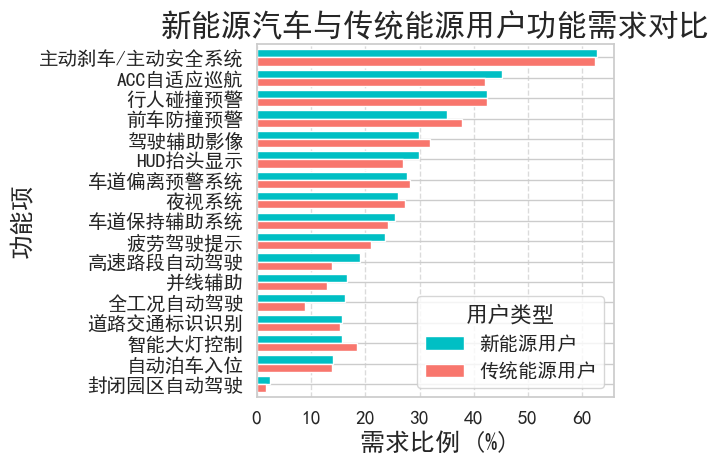

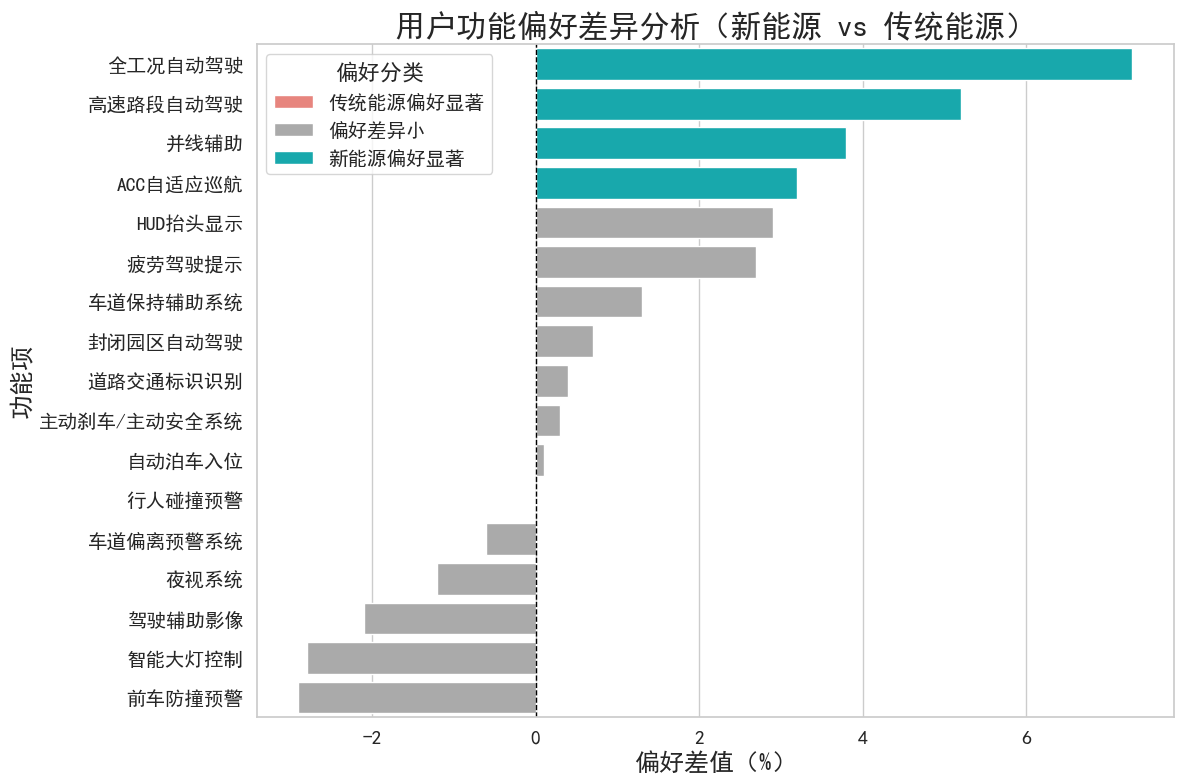

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 seaborn 样式和中文字体
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 1. 数据读入
# -----------------------------
car_user_demand = {
    "主动刹车/主动安全系统": {"新能源用户": 62.7, "传统能源用户": 62.4},
    "ACC自适应巡航": {"新能源用户": 45.2, "传统能源用户": 42.0},
    "行人碰撞预警": {"新能源用户": 42.5, "传统能源用户": 42.5},
    "前车防撞预警": {"新能源用户": 35.0, "传统能源用户": 37.9},
    "驾驶辅助影像": {"新能源用户": 29.9, "传统能源用户": 32.0},
    "HUD抬头显示": {"新能源用户": 29.9, "传统能源用户": 27.0},
    "车道偏离预警系统": {"新能源用户": 27.7, "传统能源用户": 28.3},
    "车道保持辅助系统": {"新能源用户": 25.4, "传统能源用户": 24.1},
    "夜视系统": {"新能源用户": 26.1, "传统能源用户": 27.3},
    "疲劳驾驶提示": {"新能源用户": 23.7, "传统能源用户": 21.0},
    "高速路段自动驾驶": {"新能源用户": 19.1, "传统能源用户": 13.9},
    "并线辅助": {"新能源用户": 16.7, "传统能源用户": 12.9},
    "全工况自动驾驶": {"新能源用户": 16.2, "传统能源用户": 8.9},
    "道路交通标识识别": {"新能源用户": 15.7, "传统能源用户": 15.3},
    "智能大灯控制": {"新能源用户": 15.7, "传统能源用户": 18.5},
    "自动泊车入位": {"新能源用户": 14.0, "传统能源用户": 13.9},
    "封闭园区自动驾驶": {"新能源用户": 2.4, "传统能源用户": 1.7}
}

# 转换为 DataFrame 并按新能源用户降序排列
raw_df = pd.DataFrame(car_user_demand).T
raw_df = raw_df.sort_values(by="新能源用户", ascending=False)

# -----------------------------
# 2. 基本对比柱状图
# -----------------------------
plt.figure(figsize=(12, 10))
raw_df.plot(kind='barh', color=["#00BFC4", "#F8766D"], width=0.8)
plt.title("新能源汽车与传统能源用户功能需求对比", fontsize=22)
plt.xlabel("需求比例 (%)", fontsize=18)
plt.ylabel("功能项", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend(title="用户类型", fontsize=14, title_fontsize=16, loc="lower right")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------
# 3. 差值分析 & 分类
# -----------------------------
raw_df["差值（新能源 - 传统）"] = raw_df["新能源用户"] - raw_df["传统能源用户"]
df_diff = raw_df.sort_values(by="差值（新能源 - 传统）", ascending=False)
df_diff["偏好分类"] = pd.cut(
    df_diff["差值（新能源 - 传统）"],
    bins=[-float('inf'), -3, 3, float('inf')],
    labels=["传统能源偏好显著", "偏好差异小", "新能源偏好显著"]
)

# -----------------------------
# 4. 差值分类可视化
# -----------------------------
plt.figure(figsize=(12, 8))
sns.barplot(
    x="差值（新能源 - 传统）",
    y=df_diff.index,
    hue="偏好分类",
    data=df_diff,
    dodge=False,
    palette={"新能源偏好显著": "#00BFC4", "偏好差异小": "#AAAAAA", "传统能源偏好显著": "#F8766D"}
)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("用户功能偏好差异分析（新能源 vs 传统能源）", fontsize=22)
plt.xlabel("偏好差值（%）", fontsize=18)
plt.ylabel("功能项", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title="偏好分类", title_fontsize=16)
plt.tight_layout()
plt.show()

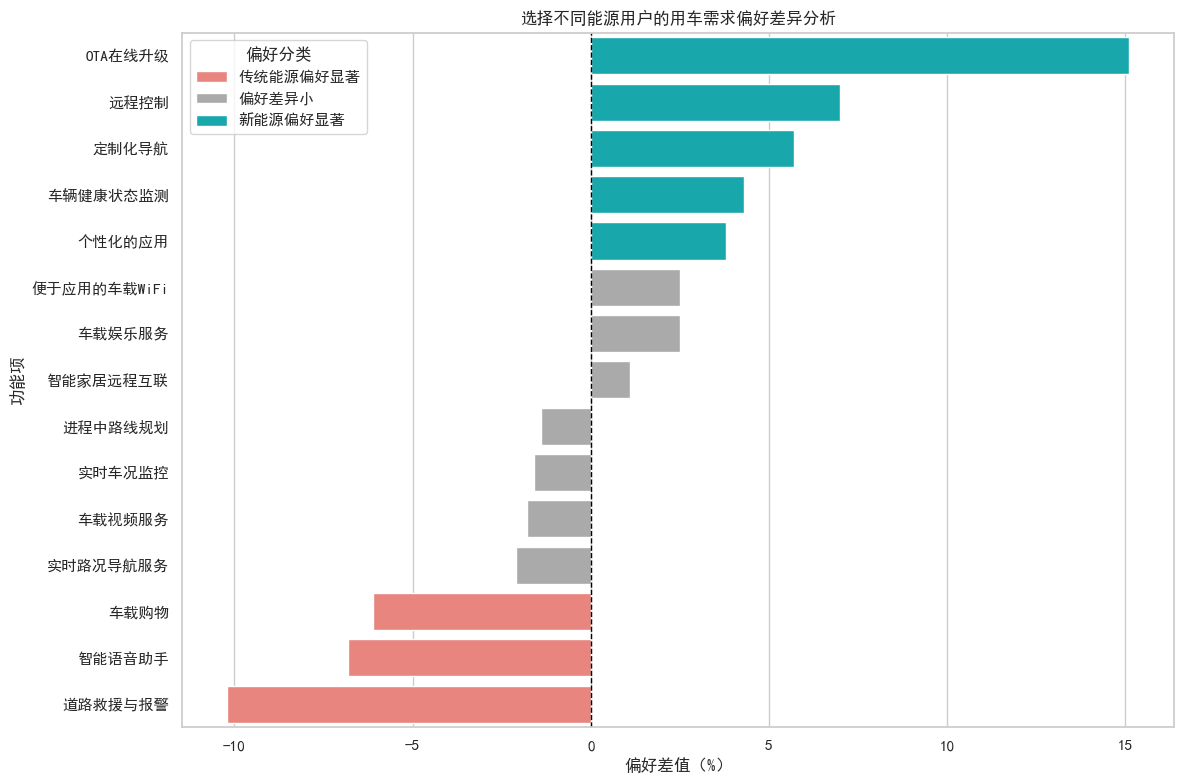

In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. 数据读入
# -----------------------------
connected_feature_demand = {
    "实时车况监控": {"新能源用户": 52.8, "传统能源用户": 54.4},
    "OTA在线升级": {"新能源用户": 48.2, "传统能源用户": 33.1},
    "远程控制": {"新能源用户": 45.8, "传统能源用户": 38.8},
    "实时路况导航服务": {"新能源用户": 40.4, "传统能源用户": 42.5},
    "道路救援与报警": {"新能源用户": 30.9, "传统能源用户": 41.1},
    "智能语音助手": {"新能源用户": 29.1, "传统能源用户": 35.9},
    "定制化导航": {"新能源用户": 26.7, "传统能源用户": 21.0},
    "进程中路线规划": {"新能源用户": 19.6, "传统能源用户": 21.0},
    "个性化的应用": {"新能源用户": 18.4, "传统能源用户": 14.6},
    "车载购物": {"新能源用户": 15.3, "传统能源用户": 21.4},
    "便于应用的车载WiFi": {"新能源用户": 13.4, "传统能源用户": 10.9},
    "车辆健康状态监测": {"新能源用户": 11.1, "传统能源用户": 6.8},
    "车载娱乐服务": {"新能源用户": 11.1, "传统能源用户": 8.6},
    "智能家居远程互联": {"新能源用户": 7.1, "传统能源用户": 6.0},
    "车载视频服务": {"新能源用户": 5.9, "传统能源用户": 7.7}
}

# 创建DataFrame
df_conn = pd.DataFrame(connected_feature_demand).T
df_conn["差值（新能源 - 传统）"] = df_conn["新能源用户"] - df_conn["传统能源用户"]
df_conn_sorted = df_conn.sort_values(by="差值（新能源 - 传统）", ascending=False)

# 偏好分类
df_conn_sorted["偏好分类"] = pd.cut(
    df_conn_sorted["差值（新能源 - 传统）"],
    bins=[-float('inf'), -3, 3, float('inf')],
    labels=["传统能源偏好显著", "偏好差异小", "新能源偏好显著"]
)

# 可视化：功能偏好差值对比图
plt.figure(figsize=(12, 8))
sns.barplot(
    x="差值（新能源 - 传统）",
    y=df_conn_sorted.index,
    hue="偏好分类",
    data=df_conn_sorted,
    dodge=False,
    palette={"新能源偏好显著": "#00BFC4", "偏好差异小": "#AAAAAA", "传统能源偏好显著": "#F8766D"}
)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("选择不同能源用户的用车需求偏好差异分析")
plt.xlabel("偏好差值（%）")
plt.ylabel("功能项")
plt.tight_layout()
plt.show()


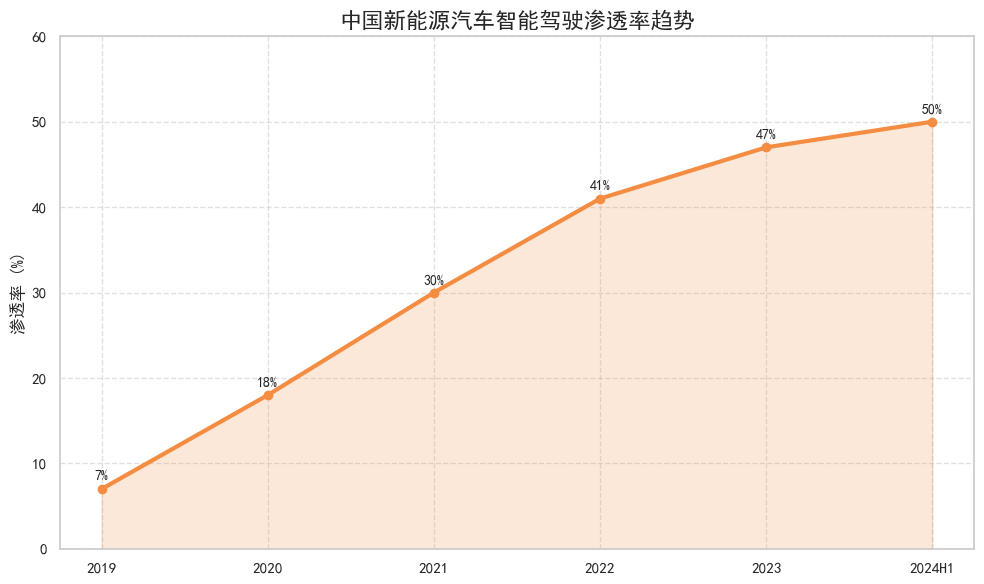

In [21]:
# 数据来源：中国智能化驾驶商业化发展白皮书（2025）

import matplotlib.pyplot as plt

# 数据构建
years = ['2019', '2020', '2021', '2022', '2023', '2024H1']
penetration_rates = [7, 18, 30, 41, 47, 50]

plt.figure(figsize=(10, 6))
plt.plot(years, penetration_rates, marker='o', color='#F48C42', linewidth=3)
plt.fill_between(years, penetration_rates, color='#F48C42', alpha=0.2)

# 添加数值标签
for i, rate in enumerate(penetration_rates):
    plt.text(i, rate + 1, f'{rate}%', ha='center', fontsize=10)

# 图形美化
plt.title("中国新能源汽车智能驾驶渗透率趋势", fontsize=16, weight='bold')
plt.ylabel("渗透率 (%)", fontsize=12)
plt.ylim(0, 60)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



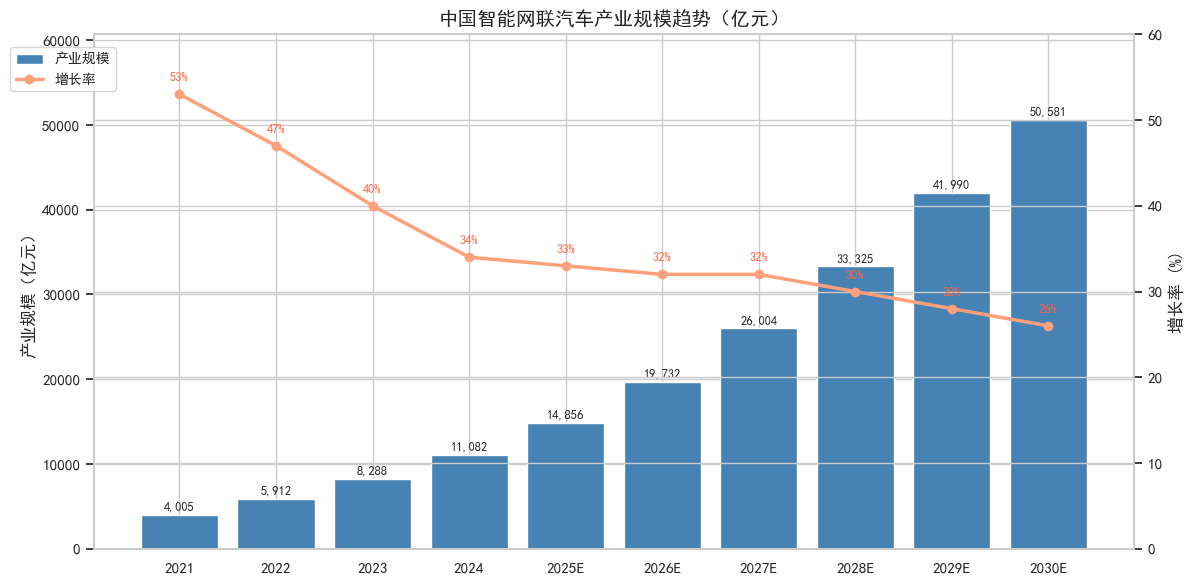

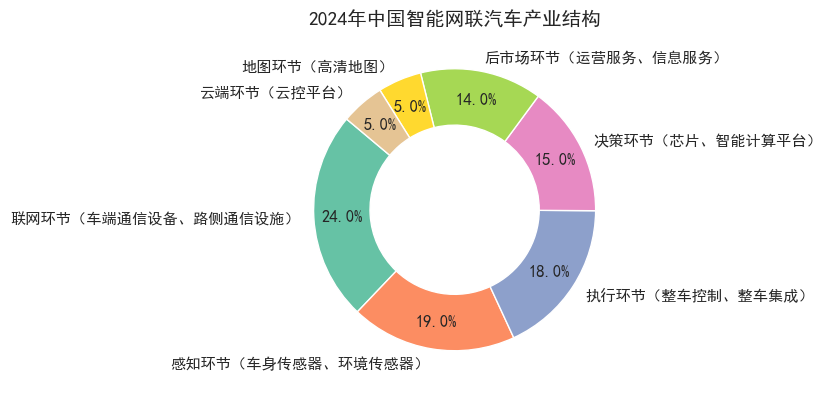

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ===============================
# 图表 1: 中国智能网联汽车产业规模趋势
# ===============================
years = ['2021', '2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E']
market_size = [4005, 5912, 8288, 11082, 14856, 19732, 26004, 33325, 41990, 50581]  # 亿元
growth_rate = [53, 47, 40, 34, 33, 32, 32, 30, 28, 26]

# 创建图表
fig, ax1 = plt.subplots(figsize=(12, 6))

# 条形图
bars = ax1.bar(years, market_size, color="#4682B4", label="产业规模")
ax1.set_ylabel("产业规模（亿元）", fontsize=12)
ax1.set_ylim(0, max(market_size)*1.2)

# 标注值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 500, f"{height:,}", ha='center', fontsize=9)

# 投影折线图
ax2 = ax1.twinx()
ax2.plot(years, growth_rate, color="#FFA07A", marker='o', linewidth=2.5, label="增长率")
ax2.set_ylabel("增长率 (%)", fontsize=12)
ax2.set_ylim(0, 60)

for i, rate in enumerate(growth_rate):
    ax2.text(i, rate + 1.5, f"{rate}%", ha='center', fontsize=9, color='#FF6347')

# 合并图传
fig.legend(loc="upper right", bbox_to_anchor=(0.1, 0.92), fontsize=10)
plt.title("中国智能网联汽车产业规模趋势（亿元）", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ===============================
# 图表 2: 2024年产业结构饮饼图
# ===============================
industry_structure = {
    "联网环节（车端通信设备、路侧通信设施）": 24,
    "感知环节（车身传感器、环境传感器）": 19,
    "执行环节（整车控制、整车集成）": 18,
    "决策环节（芯片、智能计算平台）": 15,
    "后市场环节（运营服务、信息服务）": 14,
    "地图环节（高清地图）": 5,
    "云端环节（云控平台）": 5
}

# 饮饼图结构
plt.figure(figsize=(8, 8))
labels = list(industry_structure.keys())
values = list(industry_structure.values())

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.8,
        colors=sns.color_palette("Set2"), wedgeprops=dict(width=0.4))
plt.title("2024年中国智能网联汽车产业结构", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


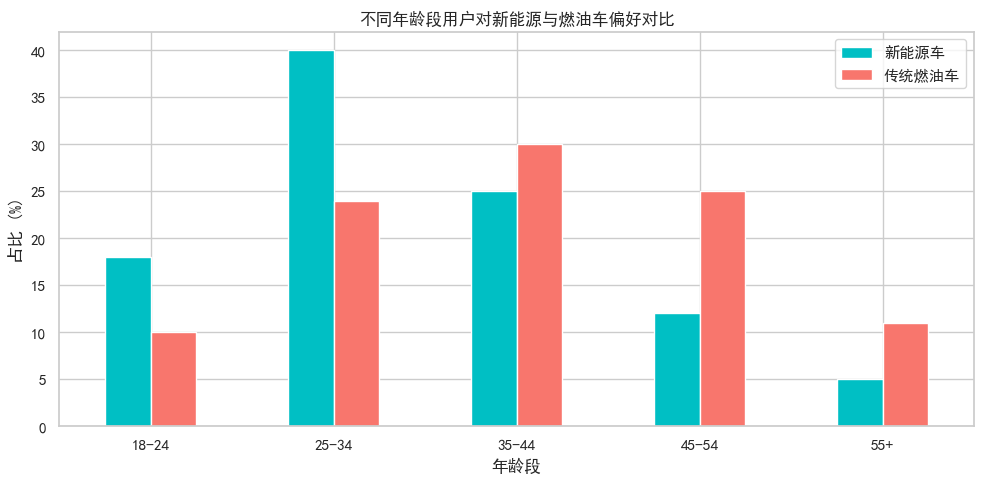

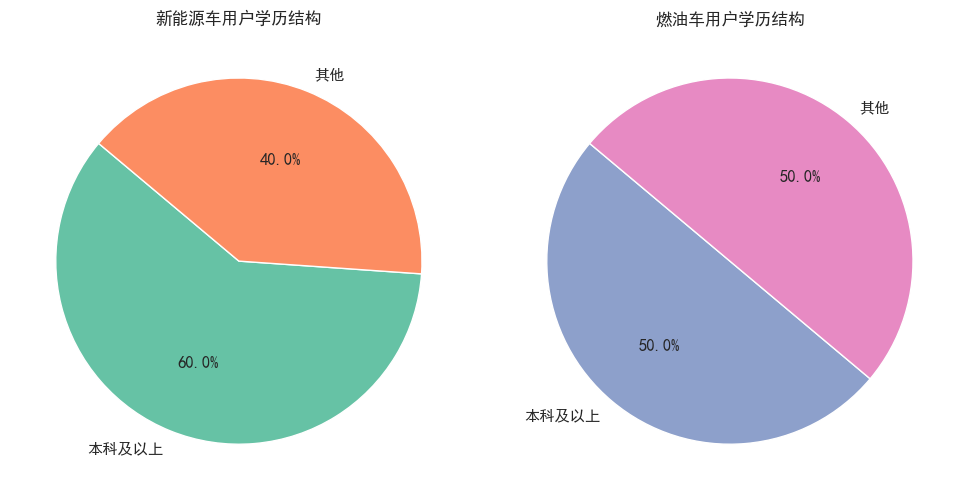

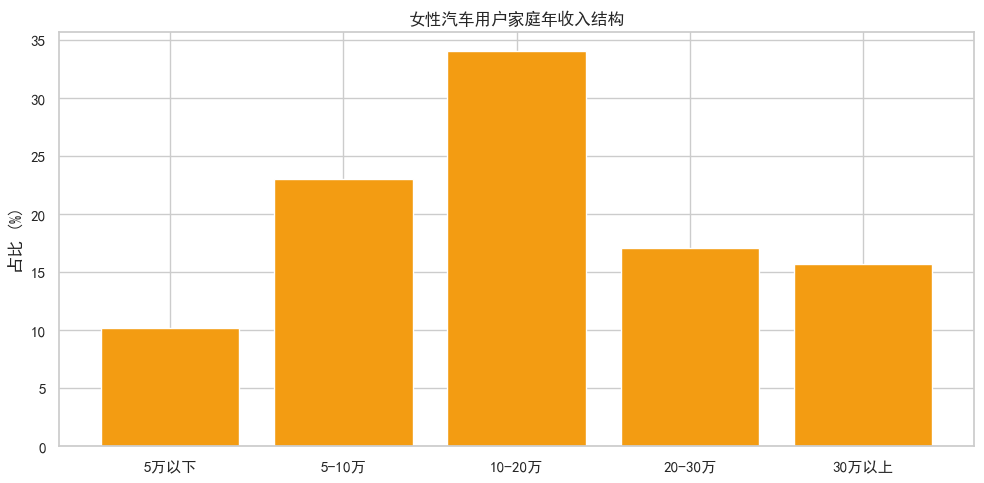

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据整理：来自报告的结构化信息
age_segments = ["18-24", "25-34", "35-44", "45-54", "55+"]
nev_age = [18, 40, 25, 12, 5]
icev_age = [10, 24, 30, 25, 11]

education = ["本科及以上", "其他"]
nev_edu = [60, 40]
icev_edu = [50, 50]

income_levels = ["5万以下", "5-10万", "10-20万", "20-30万", "30万以上"]
female_income = [10.2, 23.0, 34.0, 17.1, 15.7]  # 累加至100%

# ---------------------------
# 年龄结构对比柱状图
# ---------------------------
df_age = pd.DataFrame({
    "年龄段": age_segments,
    "新能源车": nev_age,
    "传统燃油车": icev_age
})

df_age.set_index("年龄段").plot(kind="bar", figsize=(10, 5), color=["#00BFC4", "#F8766D"])
plt.title("不同年龄段用户对新能源与燃油车偏好对比")
plt.ylabel("占比 (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------------------------
# 学历结构对比饼图
# ---------------------------
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(nev_edu, labels=education, autopct="%1.1f%%", startangle=140, colors=["#66c2a5", "#fc8d62"])
axs[0].set_title("新能源车用户学历结构")
axs[1].pie(icev_edu, labels=education, autopct="%1.1f%%", startangle=140, colors=["#8da0cb", "#e78ac3"])
axs[1].set_title("燃油车用户学历结构")
plt.tight_layout()
plt.show()

# ---------------------------
# 女性用户收入结构堆叠柱状图
# ---------------------------
df_income = pd.DataFrame({
    "收入段": income_levels,
    "女性用户占比": female_income
})

plt.figure(figsize=(10, 5))
plt.bar(df_income["收入段"], df_income["女性用户占比"], color="#f39c12")
plt.title("女性汽车用户家庭年收入结构")
plt.ylabel("占比 (%)")
plt.tight_layout()
plt.show()


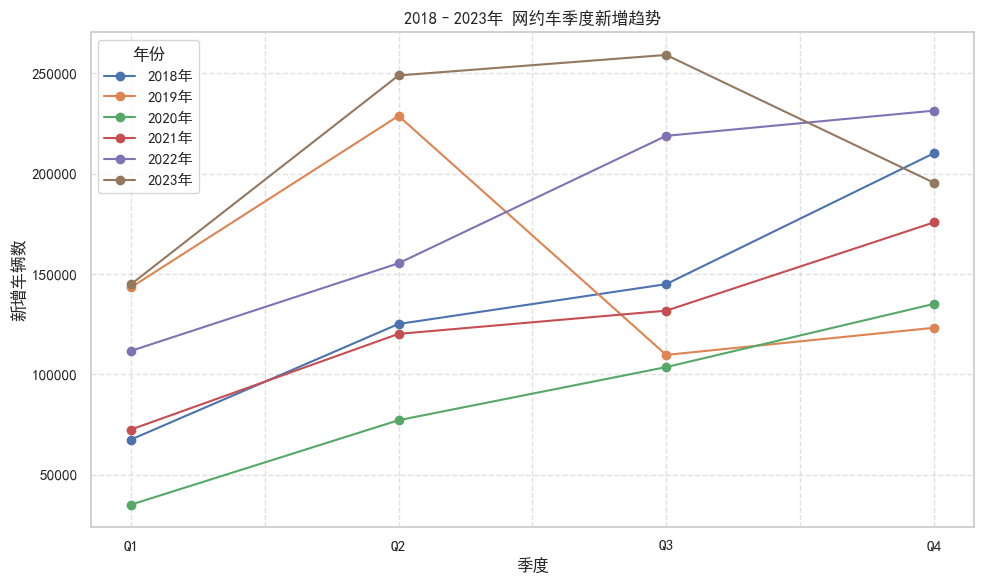

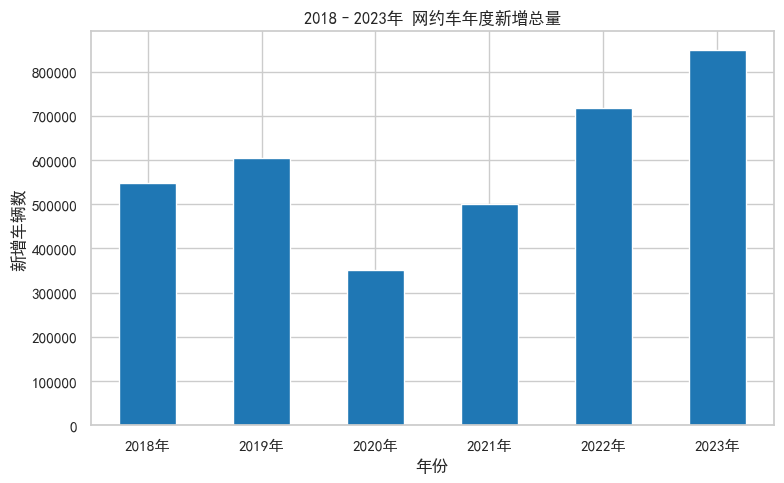

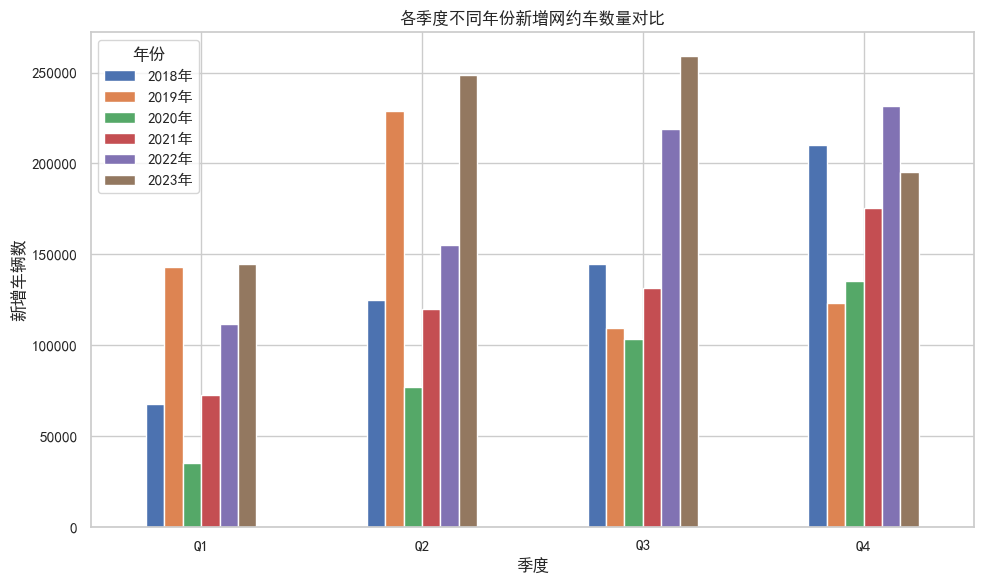

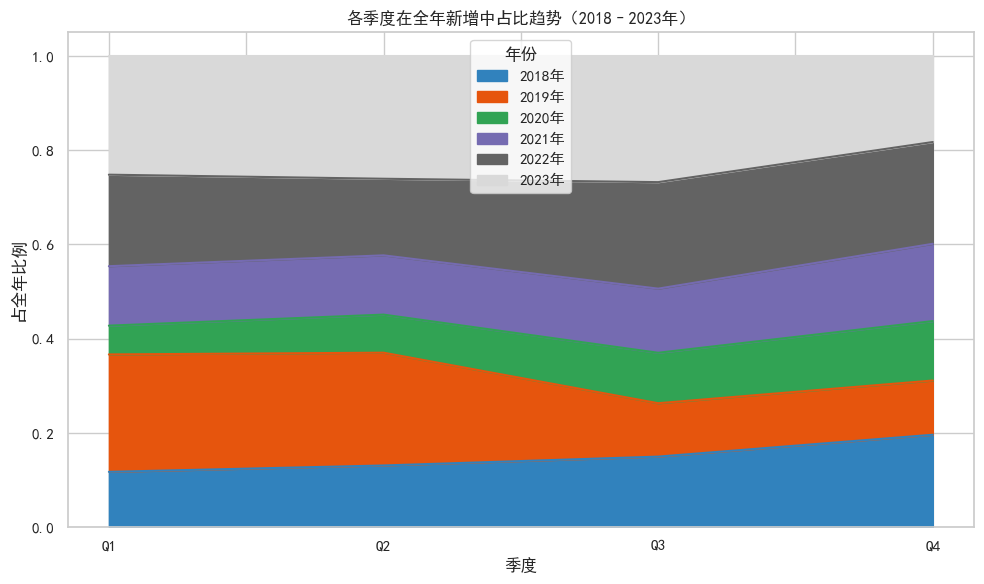

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 构建数据表
data = {
    "年份": ["2018年", "2019年", "2020年", "2021年", "2022年", "2023年"],
    "Q1": [67537, 143297, 35142, 72543, 111700, 144835],
    "Q2": [125112, 228717, 77193, 120187, 155339, 248860],
    "Q3": [144949, 109702, 103648, 131731, 218792, 259073],
    "Q4": [210111, 123213, 135096, 175679, 231326, 195452],
    "年度": [547709, 604929, 351079, 500140, 717157, 848220]
}

df = pd.DataFrame(data)
df.set_index("年份", inplace=True)

# =====================
# 折线图：季度新增趋势
# =====================
df_quarters = df.drop(columns="年度")
df_quarters.T.plot(kind="line", marker='o', figsize=(10, 6))
plt.title("2018–2023年 网约车季度新增趋势")
plt.xlabel("季度")
plt.ylabel("新增车辆数")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# =====================
# 柱状图：年度总新增
# =====================
plt.figure(figsize=(8, 5))
df["年度"].plot(kind="bar", color="#1f77b4")
plt.title("2018–2023年 网约车年度新增总量")
plt.ylabel("新增车辆数")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# =====================
# 群组柱状图：同季度不同年份对比
# =====================
df_q_grouped = df.drop(columns="年度").T
df_q_grouped.plot(kind="bar", figsize=(10, 6))
plt.title("各季度不同年份新增网约车数量对比")
plt.ylabel("新增车辆数")
plt.xlabel("季度")
plt.xticks(rotation=0)
plt.legend(title="年份")
plt.tight_layout()
plt.show()

# =====================
# 面积图：季度占比变化趋势
# =====================
quarter_prop = df_quarters.div(df_quarters.sum(axis=0), axis=1).T
quarter_prop.plot(kind="area", stacked=True, figsize=(10, 6), colormap="tab20c")
plt.title("各季度在全年新增中占比趋势（2018–2023年）")
plt.ylabel("占全年比例")
plt.xlabel("季度")
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import plotly.graph_objects as go

# 构建数据
data = {
    "年份": ["2018", "2019", "2020", "2021", "2022", "2023"],
    "网约车新增量": [547709, 604929, 351079, 500140, 717157, 848220],
    "新能源占比": [0.34, 0.42, 0.50, 0.71, 0.84, 0.82]
}
df = pd.DataFrame(data)
df["新能源新增量"] = df["网约车新增量"] * df["新能源占比"]

# 构建图表
fig = go.Figure()

# 柱状图：总新增 vs 新能源新增（叠加）
fig.add_trace(go.Bar(
    x=df["年份"],
    y=df["网约车新增量"],
    name="总新增网约车",
    marker_color='rgba(158,202,225,0.8)',
    hovertemplate='总新增: %{y:,}<extra></extra>'
))
fig.add_trace(go.Bar(
    x=df["年份"],
    y=df["新能源新增量"],
    name="新能源网约车",
    marker_color='rgba(88,214,141,0.9)',
    hovertemplate='新能源新增: %{y:,}<extra></extra>'
))

# 折线图：新能源占比
fig.add_trace(go.Scatter(
    x=df["年份"],
    y=df["新能源占比"] * 100,
    name="新能源占比 (%)",
    mode="lines+markers+text",
    text=[f"{int(p*100)}%" for p in df["新能源占比"]],
    textposition="top center",
    marker=dict(size=8, color='crimson'),
    line=dict(width=2),
    yaxis="y2"
))

# 布局设置
fig.update_layout(
    title="2018–2023年 网约车新增数量与新能源渗透趋势",
    xaxis=dict(title="年份"),
    yaxis=dict(title="新增数量（辆）"),
    yaxis2=dict(title="新能源占比（%）", overlaying="y", side="right", range=[0, 100]),
    barmode='overlay',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0)', bordercolor='gray'),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()


C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local\Temp\ipykernel_13876\2777080984.py:48: UserWarning:

Glyph 36742 (\N{CJK UNIFIED IDEOGRAPH-8F86}) missing from font(s) DejaVu Sans.

C:\Users\12914\AppData\Local

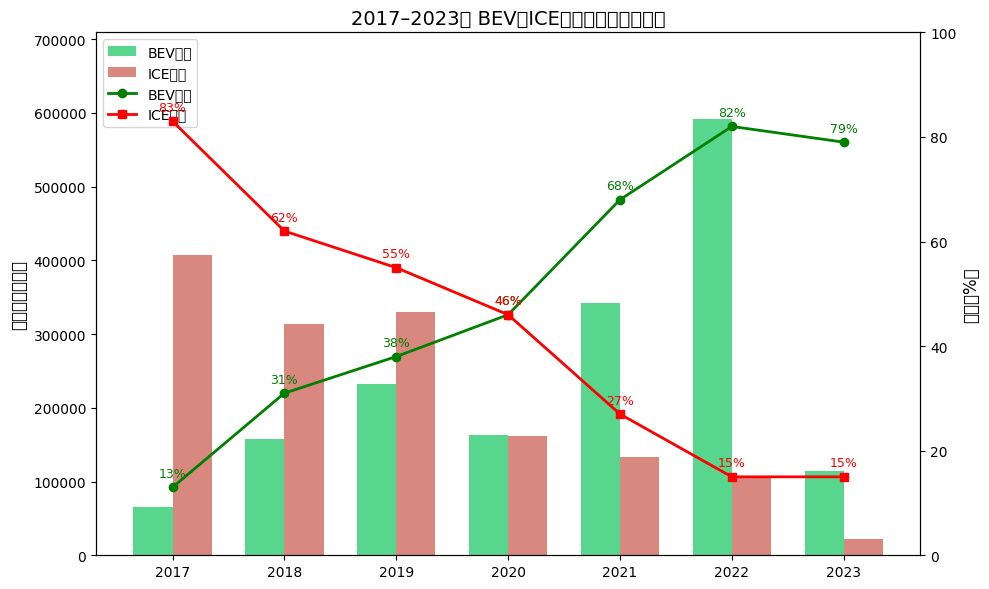

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据整理
data = {
    "年份": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BEV": [65570, 157217, 231752, 162556, 341823, 591004, 114377],
    "ICE": [407136, 314010, 329750, 162118, 133284, 106824, 22070],
    "BEV占比": [13, 31, 38, 46, 68, 82, 79],
    "ICE占比": [83, 62, 55, 46, 27, 15, 15]
}

df = pd.DataFrame(data)

# 可视化：BEV & ICE新增数量柱状图 + 占比折线图
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = range(len(df["年份"]))

# 柱状图：新增数量
ax1.bar([i - bar_width/2 for i in x], df["BEV"], width=bar_width, label="BEV新增", color="#58D68D")
ax1.bar([i + bar_width/2 for i in x], df["ICE"], width=bar_width, label="ICE新增", color="#D98880")
ax1.set_ylabel("新增数量（辆）", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(df["年份"])
ax1.tick_params(axis='y')
ax1.set_ylim(0, max(df["BEV"].max(), df["ICE"].max()) * 1.2)

# 折线图：占比趋势
ax2 = ax1.twinx()
ax2.plot(x, df["BEV占比"], color="green", marker='o', linewidth=2, label="BEV占比")
ax2.plot(x, df["ICE占比"], color="red", marker='s', linewidth=2, label="ICE占比")
ax2.set_ylabel("占比（%）", fontsize=12)
ax2.set_ylim(0, 100)

# 标注折线图文字
for i in x:
    ax2.text(i, df["BEV占比"][i] + 2, f"{df['BEV占比'][i]}%", color="green", ha='center', fontsize=9)
    ax2.text(i, df["ICE占比"][i] + 2, f"{df['ICE占比'][i]}%", color="red", ha='center', fontsize=9)

# 图例合并
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left")

plt.title("2017–2023年 BEV与ICE新增数量及占比趋势", fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import plotly.graph_objects as go

# 构建数据
data = {
    "年份": ["2018", "2019", "2020", "2021", "2022", "2023"],
    "网约车新增量": [547709, 604929, 351079, 500140, 717157, 848220],
    "新能源占比": [0.34, 0.42, 0.50, 0.71, 0.84, 0.82]
}
df = pd.DataFrame(data)
df["新能源新增量"] = df["网约车新增量"] * df["新能源占比"]

# 构建图表
fig = go.Figure()

# 柱状图：总新增 vs 新能源新增（叠加）
fig.add_trace(go.Bar(
    x=df["年份"],
    y=df["网约车新增量"],
    name="总新增网约车",
    marker_color='rgba(158,202,225,0.8)',
    hovertemplate='总新增: %{y:,}<extra></extra>'
))
fig.add_trace(go.Bar(
    x=df["年份"],
    y=df["新能源新增量"],
    name="新能源网约车",
    marker_color='rgba(88,214,141,0.9)',
    hovertemplate='新能源新增: %{y:,}<extra></extra>'
))

# 折线图：新能源占比
fig.add_trace(go.Scatter(
    x=df["年份"],
    y=df["新能源占比"] * 100,
    name="新能源占比 (%)",
    mode="lines+markers+text",
    text=[f"{int(p*100)}%" for p in df["新能源占比"]],
    textposition="top center",
    marker=dict(size=8, color='crimson'),
    line=dict(width=2),
    yaxis="y2"
))

# 布局设置：放大字号 & 标题居中
fig.update_layout(
    title=dict(
        text="2018–2023年 网约车新增数量与新能源渗透趋势",
        font=dict(size=25),  # 标题字号
        x=0.5,             # 标题水平居中
        xanchor="center"
    ),
    xaxis=dict(
        title="年份",
        title_font=dict(size=20),
        tickfont=dict(size=18)
    ),
    yaxis=dict(
        title="新增数量（辆）",
        title_font=dict(size=20),
        tickfont=dict(size=18)
    ),
    yaxis2=dict(
        title="新能源占比（%）",
        title_font=dict(size=20),
        tickfont=dict(size=18),
        overlaying="y",
        side="right",
        range=[0, 100]
    ),
    barmode='overlay',
    legend=dict(
        x=0.01,
        y=0.99,
        font=dict(size=18),
        bgcolor='rgba(255,255,255,0)',
        bordercolor='gray'
    ),
    template='plotly_white',
    width=1000,
    height=600,
    font=dict(size=20)  # 全局文字字号
)

fig.show()